In [3]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# reading the data set and uploading the data in df variable
df=pd.read_csv('insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [18]:
# We need all data in float and int values 
# so we have to convert the sex, reigon, and smoker column in int
# using one hot encoding
tem=pd.get_dummies(df['region'])
tem.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [20]:
df.drop('region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [23]:
df=pd.concat([df,tem],axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [24]:
# now converting sex and smoker values in int type using map funcion
map={'yes':1,'no':0}
df['smoker']=df['smoker'].map(map)
map1={'female':0,'male':1}
df['sex']=df['sex'].map(map1)
df.head()


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [25]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

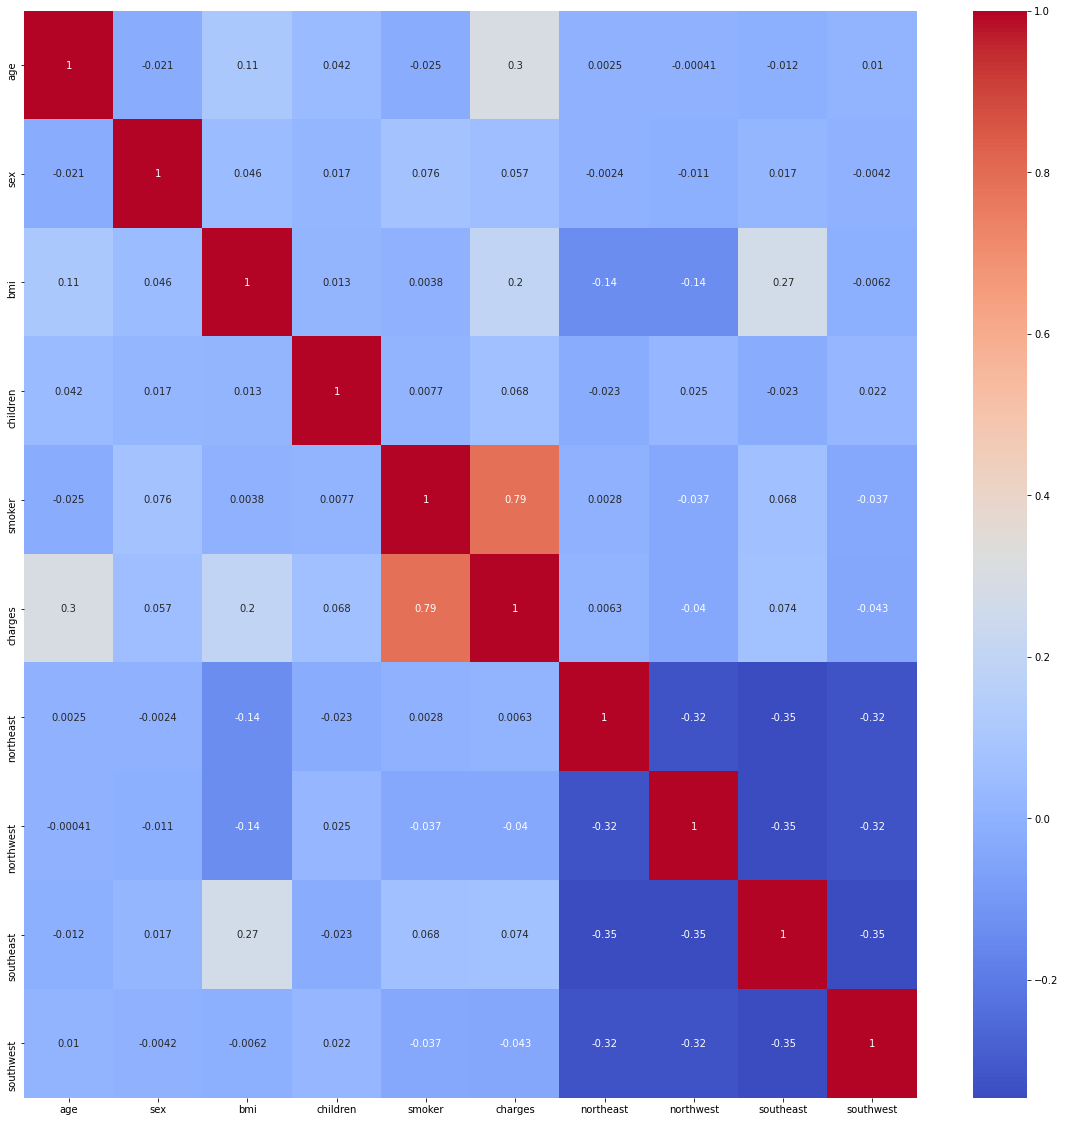

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'comprison of chrages on the basis of smoker')

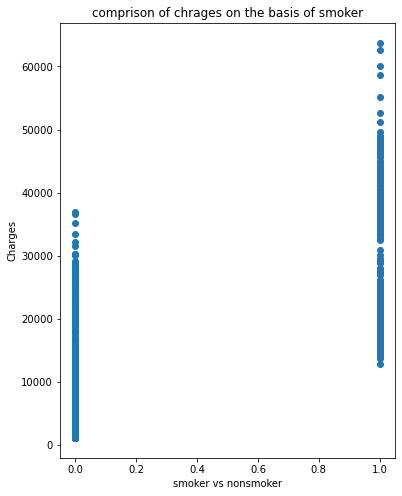

In [33]:
x=df['smoker']
y=df['charges']
plt.figure(figsize=(6,8))
plt.scatter(x,y)
plt.xlabel('smoker vs nonsmoker')
plt.ylabel('Charges')
plt.title('comprison of chrages on the basis of smoker')

In [36]:
# Now we can fit the model
y=df['charges']
x=df.drop('charges',axis=1)
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [37]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
621,37,1,34.100,4,1,0,0,0,1
194,18,1,34.430,0,0,0,0,1,0
240,23,0,36.670,2,1,1,0,0,0
1168,32,1,35.200,2,0,0,0,0,1
1192,58,0,32.395,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
763,27,1,26.030,0,0,1,0,0,0
835,42,1,35.970,2,0,0,0,1,0
1216,40,1,25.080,0,0,0,0,1,0
559,19,1,35.530,0,0,0,1,0,0


In [43]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

In [48]:
y_pred=reg.predict(x_test)
reg_acc=round(reg.score(x_test,y_test)*100,2)
from sklearn.metrics import r2_score
print(round(r2_score(y_test,y_pred)*100,2))
print(reg_acc)

80.0
80.0


In [51]:
# now using polynomial regression
from sklearn.preprocessing import PolynomialFeatures
p_x=x
#changing the data into 3rd degree polynomial
pol=PolynomialFeatures(degree=3)
p_x=pol.fit_transform(x)
p_x

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [52]:
x_train,x_test,y_train,y_test=train_test_split(p_x,y,test_size=0.2,random_state=0)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print(round(r2_score(y_test,y_pred)*100,2),'%')

85.76 %


In [53]:
# Now validating the model using cross validation
from sklearn.model_selection import cross_val_score
c=cross_val_score(reg,p_x,y,cv=5)
c

array([0.84141021, 0.77960208, 0.86681243, 0.82261183, 0.75597823])

In [54]:
print(c.mean()*100,'%')

81.32829581476656 %
